Found 4108 files belonging to 2 classes.
Found 783 files belonging to 2 classes.
Found 208 files belonging to 2 classes.
Classes: ['healthy', 'non_healthy']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 56s 309ms/step - accuracy: 0.8031 - loss: 0.4071 - val_accuracy: 0.8506 - val_loss: 0.3156
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 0.9355 - loss: 0.1852 - val_accuracy: 0.9055 - val_loss: 0.2288
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 35s 274ms/step - accuracy: 0.9676 - loss: 0.1173 - val_accuracy: 0.9195 - val_loss: 0.2054
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 35s 273ms/step - accuracy: 0.9757 - loss: 0.0889 - val_accuracy: 0.9208 - val_loss: 0.1949
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 32s 248ms/step - accuracy: 0.9820 - loss: 0.0687 - val_accuracy: 0.9272 - val_loss: 0.1755
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.9834 - loss: 0.0595 - val_accuracy: 0.9323 - val_loss: 0.1579
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.9856 - loss: 0.0544 - val_accuracy: 0.9298 - val_loss: 0.1565
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 32s 251ms/step - accuracy: 0.9873 - loss: 0.0476 - val

Test Accuracy: 0.99


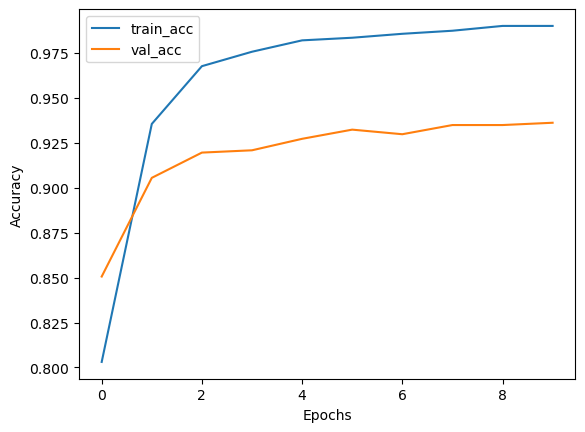

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# ========================
# CONFIGURATION
# ========================
DATA_DIR = "dataset"   # change this path to your dataset folder
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# ========================
# DATASET CREATION
# ========================
def make_datasets(data_dir):
    raw_train_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(data_dir, "train"),
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=True
    )
    raw_val_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(data_dir, "val"),
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False
    )
    raw_test_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(data_dir, "test"),
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False
    )

    # ✅ Extract class names from raw dataset (before prefetch)
    class_names = raw_train_ds.class_names

    # Cache and prefetch for performance
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    test_ds = raw_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

    return train_ds, val_ds, test_ds, class_names

# ========================
# BUILD MODEL
# ========================
def build_model(num_classes):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=IMG_SIZE + (3,),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False  # freeze base model initially

    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# ========================
# TRAIN + EVALUATE
# ========================
if __name__ == "__main__":
    train_ds, val_ds, test_ds, class_names = make_datasets(DATA_DIR)

    num_classes = len(class_names)
    print("Classes:", class_names)

    model = build_model(num_classes)

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS
    )

    # Evaluate
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.2f}")

    # Save model
    model.save("fine_tuned_model.h5")

    # Plot training history
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
